<a href="https://colab.research.google.com/github/ClovisMonteiro/Redes_neurais/blob/master/Arquitetura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definindo uma arquitetura no PyTorch

### Carregando dados

Exemplo de dados não linerares separáveis( Distribuição em lua ):
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html


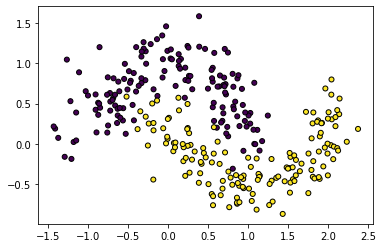

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')

## nn.Sequential

O módulo nn.Sequantial é um container onde se pode colocar múltiplos módulos. Ao realizar um foward em um objeto sequential apricará sequencialmente os módulos nele contidaspara gerar uma saída.
Exemplo abaixo desse módulo contendo 2 camadas Linear intercaladas por uma função de ativação ReLU.

In [4]:
import torch 
from torch import nn #neural network

input_size = 2
output_size = 1
hidden_size = 4

net = nn.Sequential(nn.Linear(in_features = input_size , out_features= hidden_size ),  # hidden (escondida)
                    nn.ReLU(), # ativação não linear
                    nn.Linear(in_features=hidden_size  , out_features = output_size)) #output(saída)

print(net)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
)


O módulo Summary da biblioteca torchsummary nos permite visualizar mais informações sobre a nossa rede, como a quantidade de parãmetros e o tamanho que cada elemento ocupa na memória.
Para mais informações ou consutar posteriormente:  https://github.com/sksq96/pytorch-summary

In [7]:
from torchsummary import summary


summary(net, input_size= (1, input_size))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
              ReLU-2                 [-1, 1, 4]               0
            Linear-3                 [-1, 1, 1]               5
Total params: 17
Trainable params: 17
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


### Foward


In [11]:
print(X1.shape)
tensor = torch.from_numpy(X1).float()
pred = net(tensor)
print(pred.size())

(300, 2)
torch.Size([300, 1])


# Classe torch.nn.Module()

pytorch.org/docs/stable/nn.html